### Introduction to the problem

Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:
HELP International have been able to raise around $10 million donation. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, our Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we suggest the countries which the CEO needs to focus on the most.

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 ### Analysis of the dataset

In [167]:
country=pd.read_csv('Country-data.csv')
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [168]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

The dataset is very clean, no missing values

 #### Correlation matrix of our dataset

In [169]:
# Build correlation matrix
country_corr = country.corr()
country_corr.style.background_gradient(cmap='PuBu')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


gdpp and income, life_expectancy and exports are positively correlated   

child_mort and total_fert are also highly & positively correlated

also, life_expec and child_mort are highly negative correlated

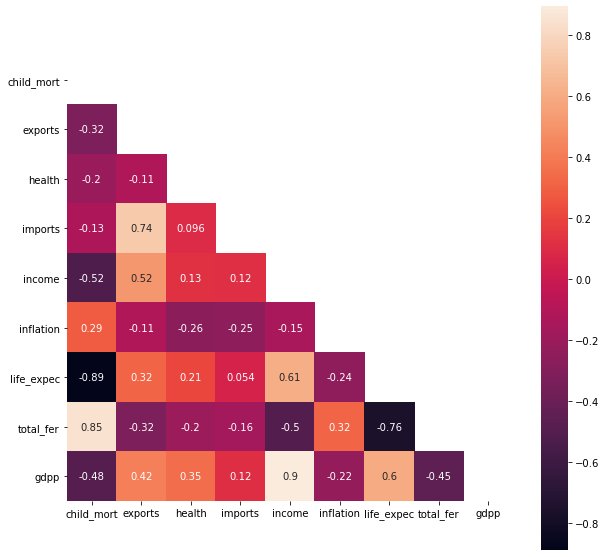

In [170]:
# Plotting heatmap

c_corr = country.corr()
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(c_corr, dtype=bool)) # removing the other side of the heatmap
#cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap, but not necessary
sns.heatmap(c_corr,mask=mask,square=True,annot=True)#cmap=cmap & linewidths=.5 are not necessary
plt.show()

### Preprocessing the numerical variables

In [171]:
# Descriptive statistics:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


The standard deviation of almost all variables is high. It means that there is big difference between the level of development of the sample countries (167 countries). Therefore we aim to identify the less-developed countires which are in the need of aid.

In [172]:
country.head(1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


In [173]:
# Standardization will help to get better results: 
from sklearn.preprocessing import StandardScaler

country_df=country.drop(columns=['country'])
country_df1=StandardScaler().fit_transform(country_df)
country_df2=pd.DataFrame(country_df1, columns=country_df.columns)
country_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [176]:
# taking few copies of the standardised dataset for further use.
country_df3=country_df2.copy()
country_df4=country_df2.copy()

### KMeans Clustering

### Choosing the optimum number of clusters (K) using inertia

[1, 2, 3, 4, 5, 6, 7, 8]
[1503.0000000000002, 1050.214558285331, 831.424435208687, 700.3229986404373, 628.5382539105312, 551.870244896614, 496.3379141841203, 450.8355649086625]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

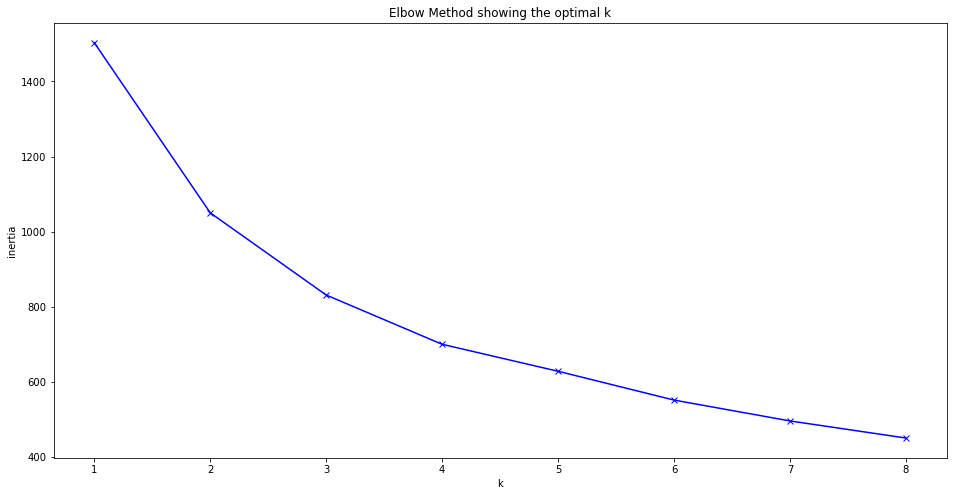

In [177]:
K = range(1, 9)
print(list(K)) # This will print a list of 1-8
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(country_df2)
    inertia.append(kmeans.inertia_)
    
print(inertia) # This shows the average squared distance from each point to its centroids

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # plotting K against the number of inertia
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

The elbow method has a convincing results of showing 4 clusters.

#### Calculating silhouette score for the k clusters

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1 in which 1 means clusters are well apart from each other and clearly distinguished.

In [178]:
# to calculate the silhouette score:

from sklearn.metrics import silhouette_score

no_K=range(2, 9)
silhouette=[]

for k in no_K:
    km=KMeans(n_clusters=k, random_state=100)
    km.fit(country_df2)
    silhouette.append(silhouette_score(country_df2, km.predict(country_df2)))
print(silhouette)


[0.2873566892140671, 0.28329575683463126, 0.29666713905612757, 0.21829471911763598, 0.23659512248062411, 0.24559479273046506, 0.2106988583449418]


Text(0.5, 1.0, 'Silhouette score showing the optimal k')

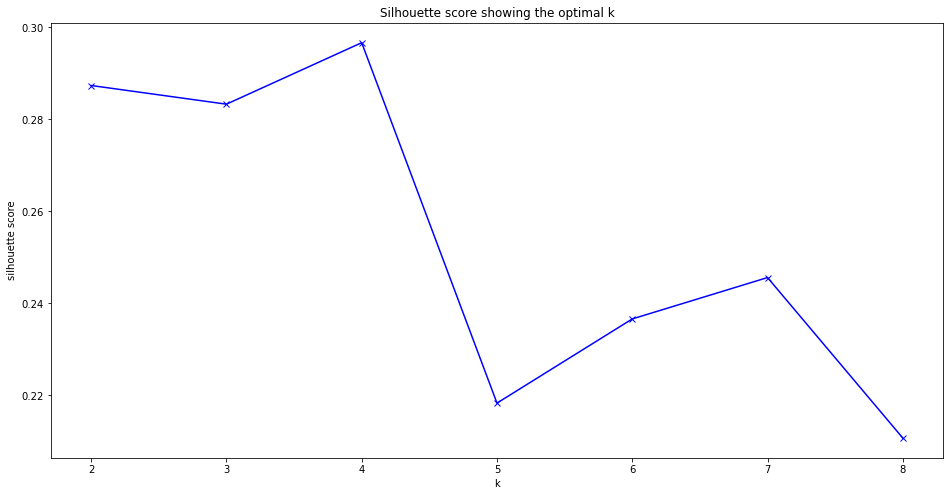

In [179]:
plt.figure(figsize=(16,8))
plt.plot(no_K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score showing the optimal k')

The highest silhouette score belongs to the cluster 4 which means that this cluster is the optimal cluster.

 Categorising the countries using socio-economic and health factors to determine the overall development of the country

In [181]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=4, random_state=100)
km1 = km.fit(country_df2)
km2 = km1.predict(country_df2)

country_df2['cluster']=km2
 
#country_df2.head()
from sklearn.metrics import silhouette_score

silhouette_score(country_df2, km2)

0.35836482808794473

In [182]:
# Cluster of our countries

country_df2['cluster'].value_counts()

2    86
1    46
0    32
3     3
Name: cluster, dtype: int64

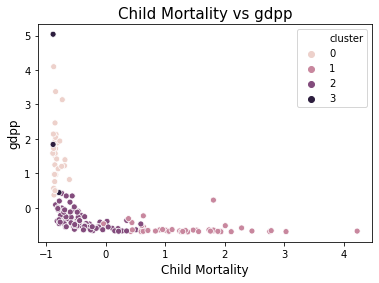

In [183]:
# to plot the clusters:
import seaborn as sns
sns.scatterplot(country_df2['child_mort'],country_df2['gdpp'],hue='cluster',data=country_df2) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()


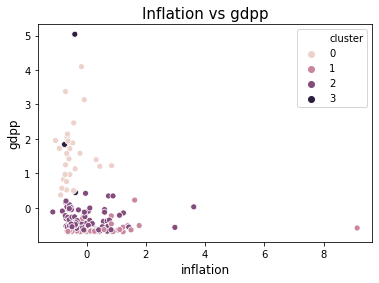

In [184]:
sns.scatterplot(country_df2['inflation'],country_df2['gdpp'],hue='cluster',data=country_df2) 
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

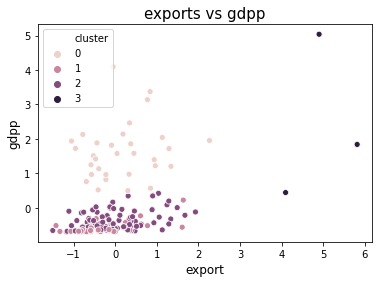

In [187]:
# to plot the clusters:
sns.scatterplot(country_df2['exports'],country_df2['gdpp'],hue='cluster',data=country_df2) 
plt.title("exports vs gdpp", fontsize=15)
plt.xlabel("export", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()


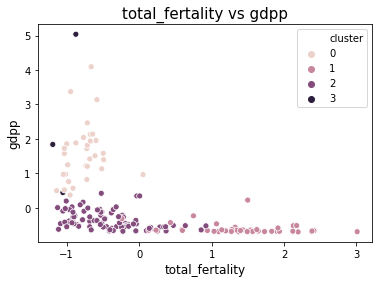

In [188]:
# to plot the clusters:
sns.scatterplot(country_df2['total_fer'],country_df2['gdpp'],hue='cluster',data=country_df2) 
plt.title("total_fertility vs gdpp", fontsize=15)
plt.xlabel("total_fertility", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()


Based on the above visulazation , we conclude that countries with low inflation, low child mortality, high export, low child mortality, and high gdpp are the developed countries. 
Countries with low GDPP, high child mortality , high fertility are the less developed countries, hence in the need of international aid. The rest of the categories are interpreted the same. Therefore; 
Cluster 0 = developed Countries,
Cluster 1 =  less_developed countries, 
and Cluster 2 = lower middle income countries.
and Cluster 3 = upper middle income countries.

### Exploratory Data Analysis¶

##### Visualizing Distribution

Plotting a pairplot would allow us to get a bigger picture of the clusters with various indicators.

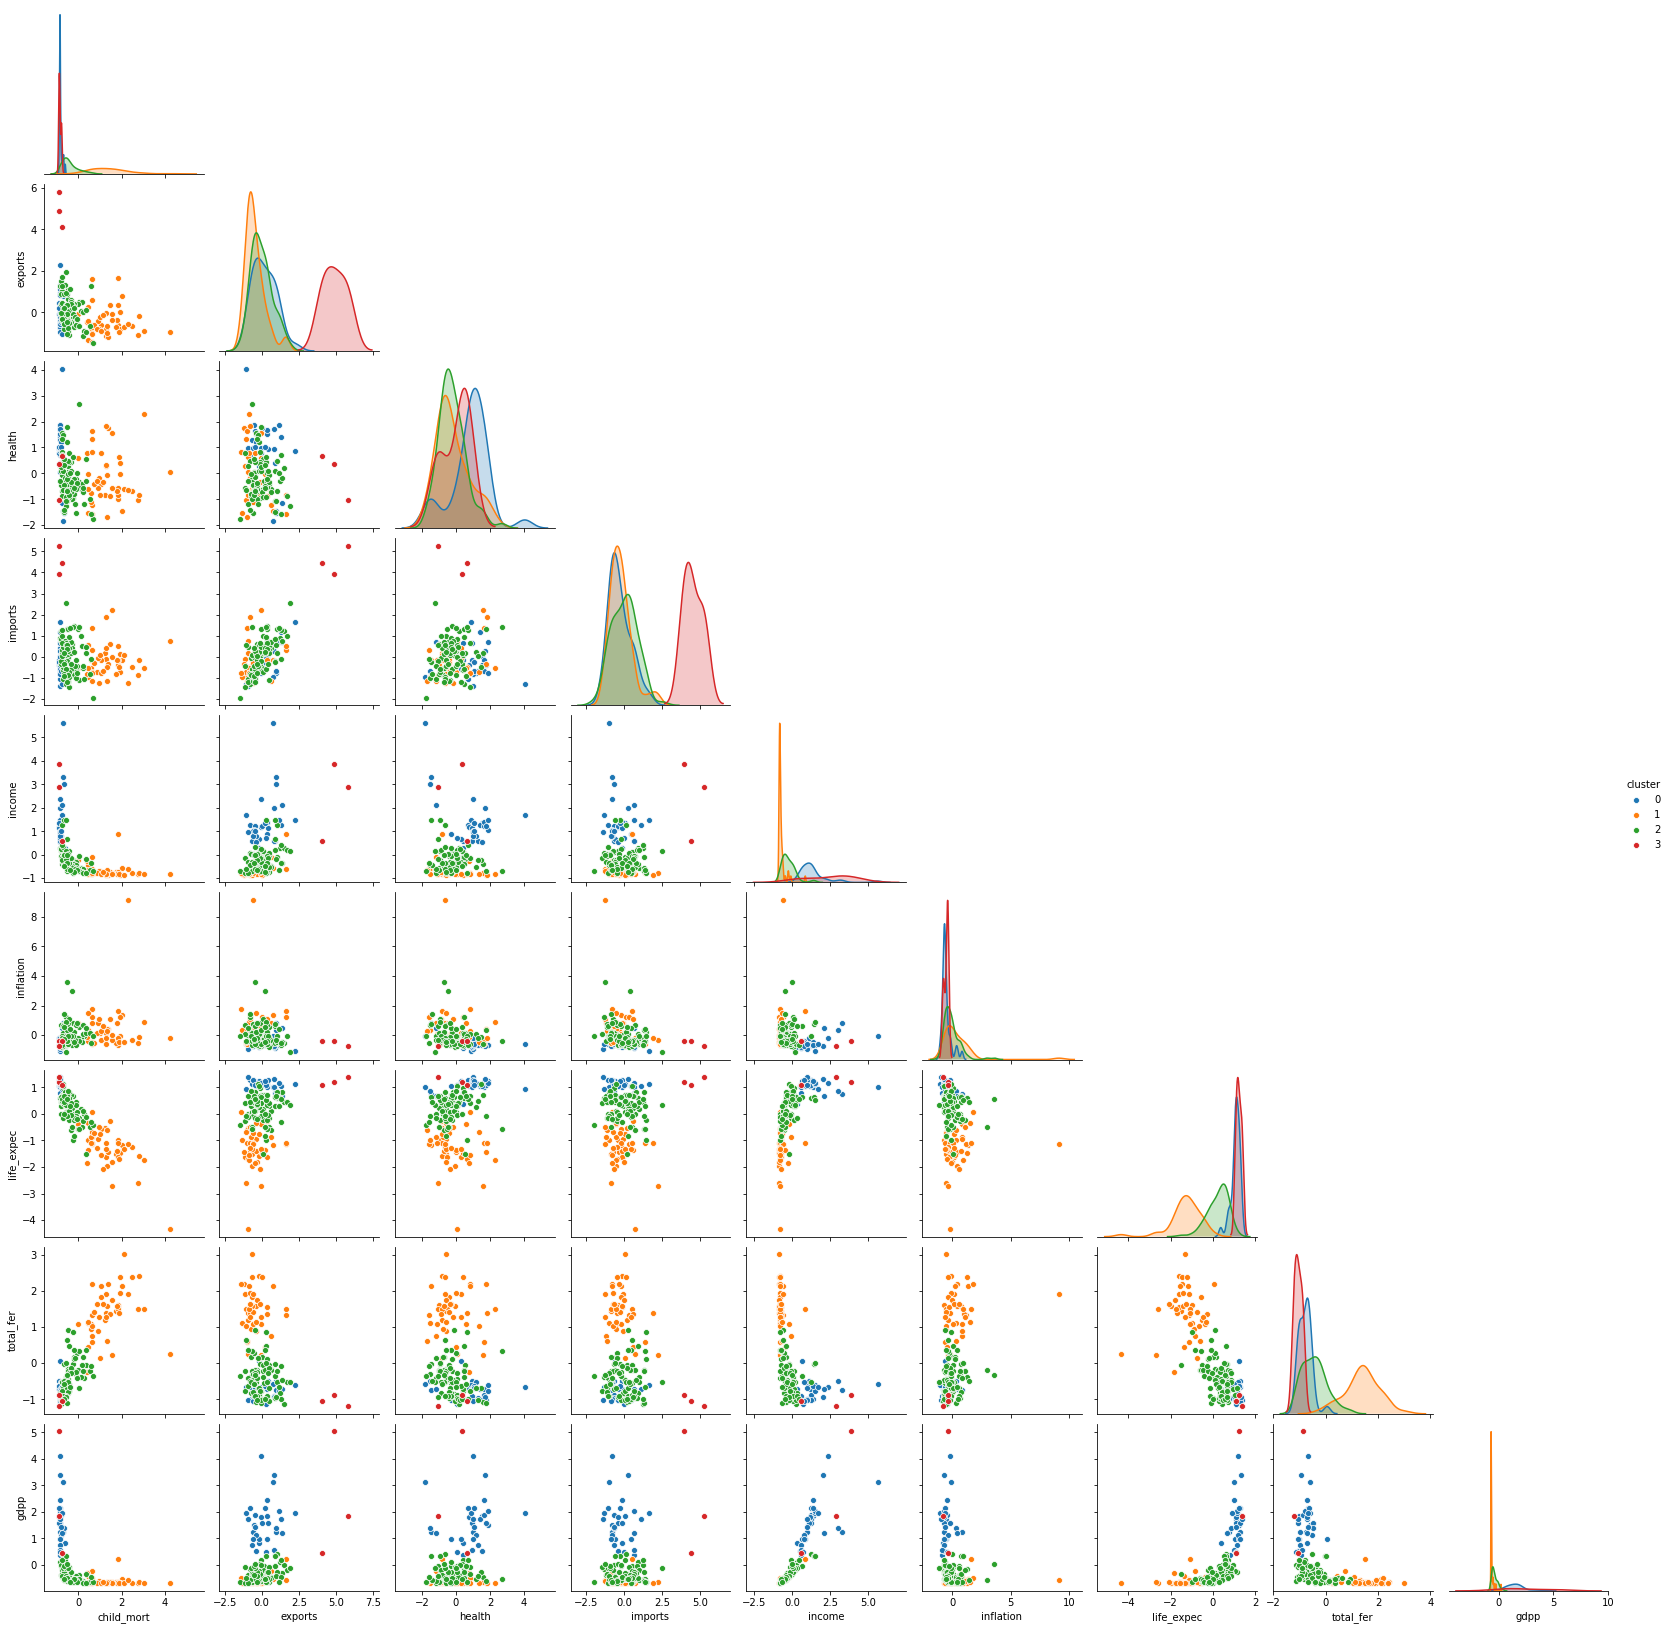

In [185]:
# for the visulation of our clusters:
sns.pairplot(country_df2, corner=True, hue='cluster')

plt.show()

In [189]:
country_df2['country'] = country['country']


In [190]:
developed=country_df2[country_df2['cluster']==0]['country']
less_developed=country_df2[country_df2['cluster']==1]['country']
lower_middle=country_df2[country_df2['cluster']==2]['country']
upper_middle=country_df2[country_df2['cluster']==3]['country']

print("Number of deveoped countries",len(developed))
print("Number of less-developed countries",len(less_developed))
print("Number of lower-middle countries",len(lower_middle))
print("Number of upper-middle countries",len(upper_middle))

Number of deveoped countries 32
Number of less-developed countries 46
Number of lower-middle countries 86
Number of upper-middle countries 3


Therefore 46 countries are in th eneed of help. We can list the name of those countries for the CEO for final decision. We can also take GDPP as a measure to rank the poorest countries among the list.

In [191]:
less_d=pd.DataFrame(less_developed)

df = pd.concat([less_d, country_df2[['gdpp','cluster']]], axis=1)
# Select rows which do not contain  any NaN value in any of the columns
aid = df[~df.isnull().any(axis=1)].sort_values(by=['gdpp']) 
aid.head()

,country,gdpp,cluster
26,Burundi,-0.696801,1
88,Liberia,-0.691547,1
37,"Congo, Dem. Rep.",-0.691164,1
112,Niger,-0.690398,1
132,Sierra Leone,-0.687607,1


It is observed that the GDP per capita (GDPP) is negative. This is an indication that the population is growing faster than the GDP in these economies, therefore the per capita GDP growth will be negative. Among the nations with negative GDPP, Burundi, Liberia, and Congo are in the serious condition.